In [16]:
import h5py

file_path = r"C:\temp\1081001.mat"

try:
    with h5py.File(file_path, 'r') as f:
        print(list(f.keys()))  # 列出變數名稱
except Exception as e:
    print(f"❌ 讀取失敗！錯誤：{e}")


❌ 讀取失敗！錯誤：[Errno 2] Unable to synchronously open file (unable to open file: name = 'C:\temp\1081001.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [1]:
import scipy.io

file_path = r"C:\Users\a6101\Documents\1081001.mat"

try:
    mat_data = scipy.io.loadmat(file_path)
    print(mat_data.keys())  # 顯示變數名稱
except Exception as e:
    print(f"❌ 讀取失敗！錯誤：{e}")


❌ 讀取失敗！錯誤：[Errno 2] No such file or directory: 'C:\\Users\\a6101\\Documents\\1081001.mat'


In [ ]:
import pandas as pd

# 讀取資料
df = pd.read_csv("sum10gen.csv")

# 選出特徵與標籤欄位
X = df[["P", "SFratio", "CoolerdT"]]  # 你要用來預測的輸入變數
y = df["Cost"]             # 你想預測的目標（例如：成本）

# 顯示前幾筆資料和欄位資訊
#df.head() #df.info()
df.head(), df.info()

In [19]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 讀取數據
df = pd.read_csv("sum10gen.csv")
df = df.dropna()
# np.isinf(data.Cost)

# 選取特徵X及標籤y欄位
X = df[["P", "SFratio", "CoolerdT"]]  # 你要用來預測的輸入變數
y = df["Cost"]             # 你想預測的目標（例如：成本）

# 切分訓練和測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 轉換數據格式為DMatrix
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

# 設置參數
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

# 訓練模型
xg_reg = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)

# 預測
preds = xg_reg.predict(test_dmatrix)

# 計算均方誤差
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

RMSE: 69497.98729740758


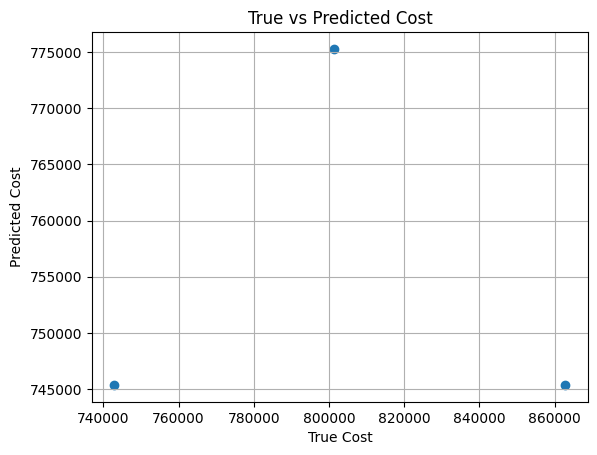

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title("True vs Predicted Cost")
plt.grid()
plt.show()


In [18]:
import pandas as pd

mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000}]
# type(mydict)
df = pd.DataFrame(mydict)  #(多行標註-->ctrl+/)
df.iloc[1,3]

np.int64(400)

In [8]:
pd.Series([4, 7, -5, 3])

0    4
1    7
2   -5
3    3
dtype: int64